In [71]:
import pandas as pd
import openpyxl

1. Загрузите данные по вариантам в ноутбук.

In [72]:
var_4 = pd.read_excel('data/Вариант 4.xlsx')

2. Сделайте описательную статистику полученных данных.

In [73]:
new_columns = var_4.iloc[1]  # выбираем вторую строку как заголовки
var_4.columns = new_columns  # присваиваем новые заголовки DataFrame
var_4.drop(index=[0, 1], inplace=True)
var_4

1,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
2,1,148,13,М,505,-----------------------,0(3)0(2)0(3)0(4),NaN,0,0,40
3,2,147,11,М,328,-----------------------,0(3)0(2)0(3)0(4),NaN,0,0,40
4,3,111,11,М,330,---+---+-+-------------,0(3)0(2)0(3)0(4),NaN,3,20,40
5,4,140,11,М,328,---+---------++--------,0(3)0(2)0(3)0(4),NaN,3,20,40
6,5,148,11,М,328,----+---------+-----+--,0(3)0(2)0(3)0(4),NaN,3,20,40
...,...,...,...,...,...,...,...,...,...,...,...
139,138,147,11,М,333,+++++++++++++++++++++++,3(3)2(2)2(3)4(4),NaN,34,97,40
140,139,140,11,М,329,+++++++++++++++++++-+++,3(3)2(2)3(3)4(4),NaN,34,97,40
141,140,148,11,Ж,332,-++++++++++++++++++++++,3(3)2(2)3(3)4(4),NaN,34,97,40
142,141,148,11,М,329,+++++++++++++++++++++++,3(3)2(2)3(3)4(4),NaN,35,100,40


3. Найдите процент учащихся, выполнивших работу ниже среднего.

In [74]:
# вычисление среднего значения
mean_score4 = var_4["Балл"].mean()

# подсчет количества учеников, у которых балл меньше среднего

below_mean4 = var_4[var_4["Балл"] < mean_score4]
count_below_mean4 = len(below_mean4)

# вычисление процента учеников, выполнивших работу ниже среднего
percent_below_mean4 = (count_below_mean4 / len(var_4)) * 100

print("Процент учащихся, выполнивших работу ниже среднего для Вар4: {:.2f}%".format(percent_below_mean4))

Процент учащихся, выполнивших работу ниже среднего для Вар4: 45.77%


4. Найти процент учащихся не сдавших экзамен.

In [75]:

non_passing4 = var_4[var_4['Балл'] <= var_4['Минимальный балл']]
count_non_passing4 = len(non_passing4)


percent_non_passing4 = (count_non_passing4 / len(var_4)) * 100


print("Процент учащихся, не сдавших экзамен для Вар4: {:.2f}%".format(percent_non_passing4))

Процент учащихся, не сдавших экзамен для Вар4: 11.97%


5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

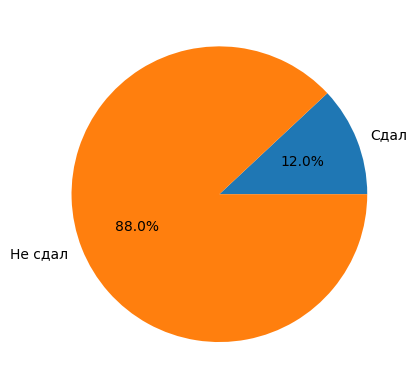

In [76]:
import matplotlib.pyplot as plt


passing4 = var_4[var_4['Балл'] <= var_4['Минимальный балл']]
count_passing4 = len(passing4)
count_non_passing4 = len(var_4) - count_passing4


data4 = {"Результат экзамена": ["Сдал", "Не сдал"],
        "Количество учеников": [count_passing4, count_non_passing4]}
df_pie4 = pd.DataFrame(data4)



plt.pie(df_pie4["Количество учеников"], labels=df_pie4["Результат экзамена"], autopct='%1.1f%%')
plt.show()

6. Постройте ядерную оценку плотности распределению баллов за экзамен.

<Axes: ylabel='Density'>

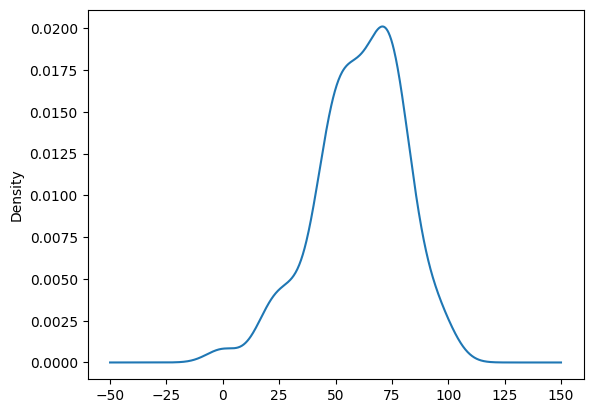

In [77]:
import scipy
scores4 = var_4['Балл']

# построение ядерной оценки плотности распределения

scores4.plot.kde()


7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [78]:
# посчитать количество студентов, получивших каждую оценку
excellent_count = var_4[var_4['Балл'] >= 86]['Балл'].count()
good_count = var_4[(var_4['Балл'] >= 70) & (var_4['Балл'] < 85)]['Балл'].count()
satisfactory_count = var_4[(var_4['Балл'] >= var_4["Минимальный балл"]) & (var_4['Балл'] < 69)]['Балл'].count()
unsatisfactory_count = var_4[var_4['Балл'] < var_4["Минимальный балл"]]['Балл'].count()

# посчитать процентное соотношение
total_count = var_4['Балл'].count()
excellent_percent = excellent_count / total_count * 100
good_percent = good_count / total_count * 100
satisfactory_percent = satisfactory_count / total_count * 100
unsatisfactory_percent = unsatisfactory_count / total_count * 100

# вывести результаты
print('Отлично: {:.2f}%'.format(excellent_percent))
print('Хорошо: {:.2f}%'.format(good_percent))
print('Удовлетворительно: {:.2f}%'.format(satisfactory_percent))
print('Неудовлетворительно: {:.2f}%'.format(unsatisfactory_percent))

Отлично: 7.04%
Хорошо: 31.69%
Удовлетворительно: 49.30%
Неудовлетворительно: 11.27%


8. Какое процентное соотношение юношей и девушек писало данный экзамен?

In [79]:
male_count = var_4[var_4['Пол'] == 'М']['Пол'].count()
female_count = var_4[var_4['Пол'] == 'Ж']['Пол'].count()

# посчитать процентное соотношение
total_count = var_4['Пол'].count()
male_percent = male_count / total_count * 100
female_percent = female_count / total_count * 100

# вывести результаты
print('Юноши: {:.2f}%'.format(male_percent))
print('Девушки: {:.2f}%'.format(female_percent))

Юноши: 77.30%
Девушки: 22.70%


9. Сколько школ принимало участие в экзамене?

In [80]:
# посчитать количество уникальных значений в столбце "N школы"
num_schools = var_4['№ школы'].nunique()

# вывести результаты
print('Количество школ, принимавших участие в экзамене: {}'.format(num_schools))

Количество школ, принимавших участие в экзамене: 10


10. Сколько всего заданий с кратким ответом? С развернутым ответом?

In [81]:
short_answer_column = var_4['Задания с кратким ответом']
short_answer_count = short_answer_column.str.count('.').max()
long_answer_column = var_4['Задания с развёрнутым ответом']
long_answer_count = long_answer_column.str.count('\(').max()
short_answer_count, long_answer_count

(23.0, 4.0)

11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В
, ... Вк
 Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [82]:
plus_answer_count = short_answer_column.str.count('\+').sum()
minus_answer_count = short_answer_column.str.count('\-').sum()
total = short_answer_column.str.count('.').sum()

plus_percent = plus_answer_count / total * 100
minus_percent = minus_answer_count / total * 100

# вывести результаты
print('Плюсов: {:.2f}%'.format(plus_percent))
print('Минусов: {:.2f}%'.format(minus_percent))


Плюсов: 58.96%
Минусов: 41.04%


In [128]:
c = 0
# посчитать количество выполненных и невыполненных заданий по каждому вопросу типа В

print('Процент выполненных и невыполненных заданий по каждому вопросу типа В:')
for b in var_4['Задания с кратким ответом']:
        c += 1
        mid_ans = b.count('+')/len(b)*100
        anti_mid = 100 - mid_ans

        print(f'Задание {c}: {mid_ans} / {anti_mid}')


Процент выполненных и невыполненных заданий по каждому вопросу типа В:
Задание 1: 0.0 / 100.0
Задание 2: 0.0 / 100.0
Задание 3: 13.043478260869565 / 86.95652173913044
Задание 4: 13.043478260869565 / 86.95652173913044
Задание 5: 13.043478260869565 / 86.95652173913044
Задание 6: 13.043478260869565 / 86.95652173913044
Задание 7: 13.043478260869565 / 86.95652173913044
Задание 8: 17.391304347826086 / 82.6086956521739
Задание 9: 17.391304347826086 / 82.6086956521739
Задание 10: 17.391304347826086 / 82.6086956521739
Задание 11: 17.391304347826086 / 82.6086956521739
Задание 12: 17.391304347826086 / 82.6086956521739
Задание 13: 21.73913043478261 / 78.26086956521739
Задание 14: 21.73913043478261 / 78.26086956521739
Задание 15: 21.73913043478261 / 78.26086956521739
Задание 16: 21.73913043478261 / 78.26086956521739
Задание 17: 26.08695652173913 / 73.91304347826087
Задание 18: 30.434782608695656 / 69.56521739130434
Задание 19: 26.08695652173913 / 73.91304347826087
Задание 20: 30.434782608695656 / 6

AttributeError: 'float' object has no attribute 'count'

In [147]:
counting = 0
print('Процент выполненных и невыполненных заданий по каждому вопросу типа С:')
for c in var_4['Задания с развёрнутым ответом']:
        counting += 1
        c0, c1, c2, c3, c4 = c.count('0'), c.count('1'), c.count('2'), c.count('3'), c.count('4')
        if c0 == 4:
                ans = 0/12*100
                anti_ans = 100-ans
        else:
                sum_ball =  c1*1 + (c2-1)*2 + (c3-2)*3 + (c4-1)*4
                ans = sum_ball/12*100
                anti_ans = 100-ans

        print(f'Задание {counting}: {ans} / {anti_ans}')


Процент выполненных и невыполненных заданий по каждому вопросу типа С:
Задание 1: 0.0 / 100.0
Задание 2: 0.0 / 100.0
Задание 3: 0.0 / 100.0
Задание 4: 0.0 / 100.0
Задание 5: 0.0 / 100.0
Задание 6: 0.0 / 100.0
Задание 7: 0.0 / 100.0
Задание 8: 0.0 / 100.0
Задание 9: 0.0 / 100.0
Задание 10: 0.0 / 100.0
Задание 11: 0.0 / 100.0
Задание 12: 0.0 / 100.0
Задание 13: 0.0 / 100.0
Задание 14: 0.0 / 100.0
Задание 15: 0.0 / 100.0
Задание 16: 0.0 / 100.0
Задание 17: 0.0 / 100.0
Задание 18: 0.0 / 100.0
Задание 19: 8.333333333333332 / 91.66666666666667
Задание 20: 0.0 / 100.0
Задание 21: 0.0 / 100.0
Задание 22: 0.0 / 100.0
Задание 23: 16.666666666666664 / 83.33333333333334
Задание 24: 8.333333333333332 / 91.66666666666667
Задание 25: 0.0 / 100.0
Задание 26: 0.0 / 100.0
Задание 27: 0.0 / 100.0
Задание 28: 25.0 / 75.0
Задание 29: 0.0 / 100.0
Задание 30: 8.333333333333332 / 91.66666666666667
Задание 31: 8.333333333333332 / 91.66666666666667
Задание 32: 0.0 / 100.0
Задание 33: 25.0 / 75.0
Задание 34: 0.0

AttributeError: 'float' object has no attribute 'count'

In [132]:
var_4

1,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
2,1,148,13,М,505,-----------------------,0(3)0(2)0(3)0(4),NaN,0,0,40
3,2,147,11,М,328,-----------------------,0(3)0(2)0(3)0(4),NaN,0,0,40
4,3,111,11,М,330,---+---+-+-------------,0(3)0(2)0(3)0(4),NaN,3,20,40
5,4,140,11,М,328,---+---------++--------,0(3)0(2)0(3)0(4),NaN,3,20,40
6,5,148,11,М,328,----+---------+-----+--,0(3)0(2)0(3)0(4),NaN,3,20,40
...,...,...,...,...,...,...,...,...,...,...,...
139,138,147,11,М,333,+++++++++++++++++++++++,3(3)2(2)2(3)4(4),NaN,34,97,40
140,139,140,11,М,329,+++++++++++++++++++-+++,3(3)2(2)3(3)4(4),NaN,34,97,40
141,140,148,11,Ж,332,-++++++++++++++++++++++,3(3)2(2)3(3)4(4),NaN,34,97,40
142,141,148,11,М,329,+++++++++++++++++++++++,3(3)2(2)3(3)4(4),NaN,35,100,40
